<ipython-input-74-c4f9e8c93360>:26: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-74-c4f9e8c93360>:26: UserWarning: Glyph 47197 (\N{HANGUL SYLLABLE ROG}) missing from current font.
  plt.tight_layout()
<ipython-input-74-c4f9e8c93360>:26: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  plt.tight_layout()
<ipython-input-74-c4f9e8c93360>:26: UserWarning: Glyph 54728 (\N{HANGUL SYLLABLE HEO}) missing from current font.
  plt.tight_layout()
<ipython-input-74-c4f9e8c93360>:26: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  plt.tight_layout()
<ipython-input-74-c4f9e8c93360>:26: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from current font.
  plt.tight_layout()
<ipython-input-74-c4f9e8c93360>:26: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  plt.tight_layout()
<ipython-input-74-c4f9e8c93360>:26: UserWarning: Glyp

<Figure size 1000x600 with 0 Axes>

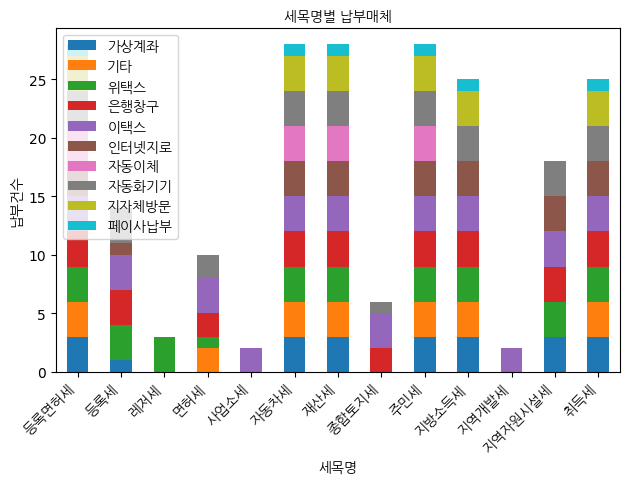

In [74]:
# 세목명별 납부매체 건수를 막대 그래프로 보여주기

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)

# 데이터 파일 읽기
data = pd.read_csv('부산광역시 연제구_지방세납부현황_20191231.csv', encoding='cp949')

# 세목명별 납부매체 건수 계산
count_by_category = data.groupby('세목명')['납부매체'].value_counts().unstack()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
count_by_category.plot(kind='bar', stacked=True)

# 그래프에 한글 폰트 적용
plt.title('세목명별 납부매체', fontproperties=fontprop)
plt.xlabel('세목명', fontproperties=fontprop)
plt.ylabel('납부건수', fontproperties=fontprop)
plt.legend(prop=fontprop)

# 세목명이 잘리지 않도록 축 조정
plt.tight_layout()

# 세목명이 제대로 보이도록 x축 라벨 설정
plt.xticks(range(len(count_by_category.index)), count_by_category.index, rotation=45, ha='right', fontproperties=fontprop)

plt.show()


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   시도명         217 non-null    object
 1   시군구명        217 non-null    object
 2   자치단체코드      217 non-null    int64 
 3   납부년도        217 non-null    int64 
 4   세목명         217 non-null    object
 5   납부매체        217 non-null    object
 6   납부매체전자고지여부  217 non-null    object
 7   납부건수        217 non-null    int64 
 8   납부금액        217 non-null    int64 
 9   납부매체비율      217 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 17.1+ KB


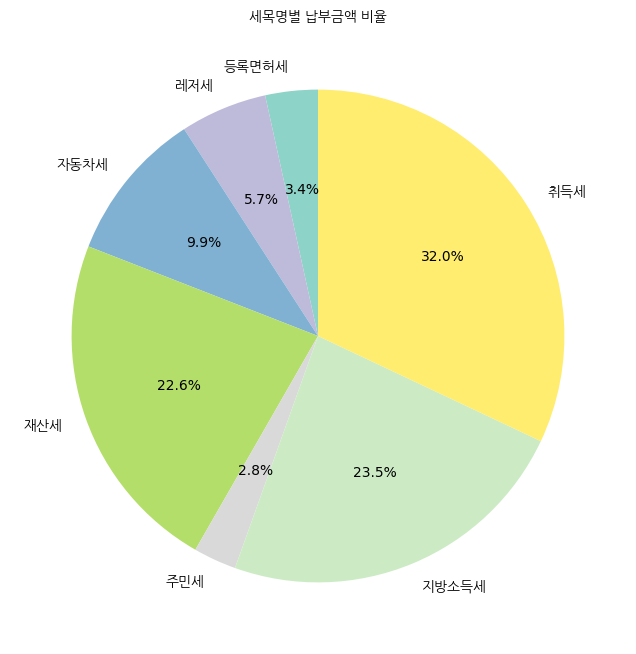

In [66]:
# 세목명별 납부금액을 파이 그래프로 나타내기

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm

# 세목명별 납부금액 합계 계산
sum_by_category = data.groupby('세목명')['납부금액'].sum()

# 납부금액 비율 계산
total_amount = sum_by_category.sum()
payment_ratio = sum_by_category / total_amount

# 1% 미만 비율 제거
payment_ratio = payment_ratio[payment_ratio >= 0.01]

# 그래프
plt.figure(figsize=(8, 8))
colors = plt.cm.Set3(np.linspace(0, 1, len(payment_ratio)))  # 색상 설정
wedges, texts, autotexts = plt.pie(payment_ratio, labels=payment_ratio.index, autopct='%1.1f%%', startangle=90,
                                   colors=colors)

# 그래프에 한글 폰트 적용
for text in texts:
    text.set_fontproperties(fontprop)

plt.title('세목명별 납부금액 비율', fontproperties=fontprop)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 47197 (\N{HANGUL SYLLABLE ROG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 54728 (\N{HANGUL SYLLABLE HEO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seab

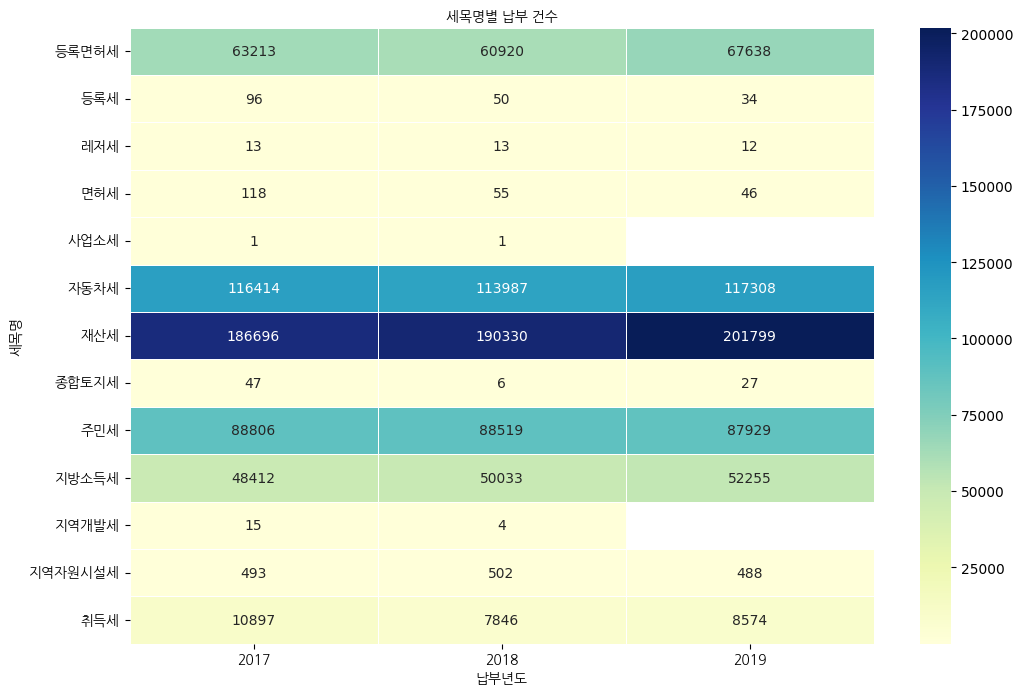

In [67]:
# 세목명별 납부 건수를 년도별로 heatmap 그래프로 나타내기

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.font_manager as fm

# pivot 테이블 생성
pivot_table = data.pivot_table(index='세목명', columns='납부년도', values='납부건수', aggfunc='sum')

# 그래프 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5, cbar=True)
plt.title('세목명별 납부 건수', fontproperties=fontprop)
plt.xlabel('납부년도', fontproperties=fontprop)
plt.ylabel('세목명', fontproperties=fontprop)
plt.xticks(fontproperties=fontprop)
plt.yticks(fontproperties=fontprop)
plt.show()
